## Starfields

In [24]:
from itertools import groupby
from operator import itemgetter
from matplotlib import pyplot as plt
import os

plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150


colors = {
    "TURQOI":"CYAN",
    "PDIWHI":"WHITE",
    "PDIRED":"RED",
    "PDIYEL":"YELLOW",
    "":"WHITE",
}

def vctr(color,x,y,i=""):
    x,y=int(x,16),int(y,16)
    if i == "0":
        return (x,y,"BLACK")
    return (x,y,colors.get(color,color))

def scvec(old_x,old_y,CM,CD,color,x,y,i=0):
    c = "BLACK" if i == 0 else colors.get(color,color)
    x = ((x * CM)/CD)/2 # Divide by 2: Hack the x scale to match Tempest
    y = (y * CM)/CD
    vec=(x-old_x,y-old_y,c)
    old_x = x
    old_y = y
    return (vec,old_x,old_y)

def parse_vector_commands(vector_data,default_color="red"):
    # Read in the vector commands from the Tempest source code
    # and translate them into a series of vectors, i.e. a  list of 
    # tuples of the form (x,y,color).
    # This list can then be transformed into a series of x,y co-ordinates
    # for plotting on a graph.
    CM = 1 # Scale multiplier
    CD = 1 # Scale divider
    CB = 1 # Intensity/Brightness
    color = ""
    vecs = []
    old_x,old_y = 0,0
    CALBRITE = "BLACK"
    for l in vector_data.splitlines():
        if not l.strip():
            continue
        tokens = l.strip().split()
        cmd, parms = tokens[0],tokens[1:]
        if cmd in ["ICVEC","ICALVE"]:
            vecs+=[(0,0,"BLACK")]
            old_x,old_y=0,0
        elif cmd.startswith("CM="):
            CM = int(cmd.split("=")[1])
        elif cmd.startswith("CB="):
            CB = int(cmd.split("=")[1])
        elif cmd.startswith("CD="):
            CD = int(cmd.split("=")[1])
        elif cmd == "SCDOT":
            # SCVEC
            parms = [int(x.replace('.',''),16) for x in parms[0].split(',')]
            vec,old_x,old_y = scvec(old_x,old_y,CM,CD,color,*parms)
            vecs+=[vec]
            # VCTR
            vecs+=[vctr(color,"0","0","CB")]
    return vecs

def vectors_to_coords(vectors):
    # Turns a series of vectors into a series of x,y co-ordinates
    # or vertices.
    xs,ys,cs=[],[],[]
    px,py,pc=0,0,None
    for x,y,c in vectors:
        # If we're changing color, add a vertex with the
        # new color at the old position.
        if pc and c != pc:
            xs+=[px]
            ys+=[py]
            cs+=[c]
        # Calculate the position of the new vertex
        px+=x
        py+=y
        xs+=[px]
        ys+=[py]
        cs+=[c]
        pc=c
    return list(zip(xs,ys,cs))

def plot_vertices(verts, file_name, points="", linewidth=3.0):
    # Plot a series of vertices onto a graph. In other words,
    # create an image from them.
    _, ax = plt.subplots()
    last_x,last_y=[],[]
    for k,g in groupby(verts, key=itemgetter(2)):
        l = list(g)
        xs,ys,_ =zip(*l)
        # Don't paint the vectors marked as black, 
        # we're just moving the beam.
        alpha = 0 if k == "BLACK" else 1
        ax.plot(xs,ys,points+'-',color=k,alpha=alpha,linewidth=linewidth)
    plt.savefig(f"starfield/vec_image_{file_name}.png", bbox_inches='tight')

def plot_vertices_imgonly(verts,file_name,points="",linewidth=3.0):
    # Plot a series of vertices onto a graph. In other words,
    # create an image from them.
    _, ax = plt.subplots()
    plt.xlim(-70,70)
    plt.ylim(-70,70)
    last_x,last_y=[],[]
    for k,g in groupby(verts, key=itemgetter(2)):
        l = list(g)
        xs,ys,_ =zip(*l)
        # Don't paint the vectors marked as black, 
        # we're just moving the beam.
        alpha = 0 if k == "BLACK" else 1
        ax.plot(xs,ys,points+'-',color=k,alpha=alpha,linewidth=linewidth)
    plt.axis('off')
    plt.savefig(f"starfield/vec_image_{file_name}.png", bbox_inches='tight')



## Plot the Starfields

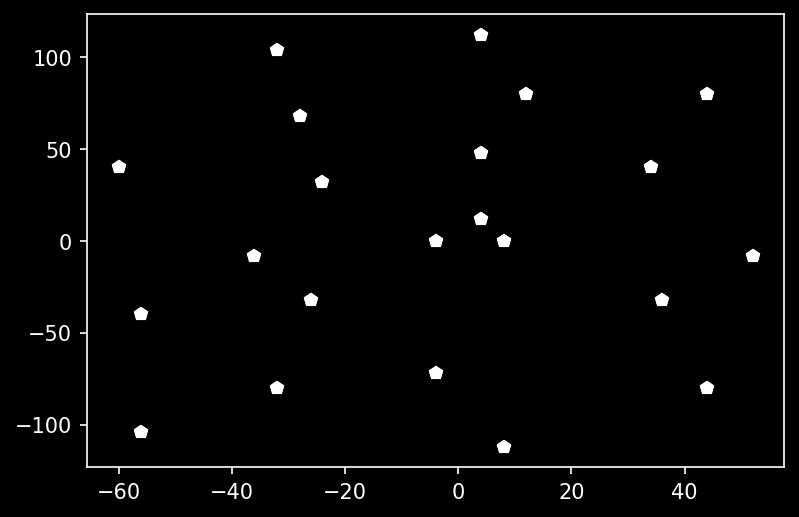

In [25]:
vector_data = """
.MACRO MSTAR1
	ICVEC
	SCDOT -8,0
	SCDOT 8,0C
	SCDOT 10,0
	SCDOT 8,30
	SCDOT -30,20
	SCDOT -34,-20
	SCDOT -8,-48
	SCDOT 48,-20
	SCDOT 44,28
	SCDOT 18,50
	SCDOT -38,44
	SCDOT -48,-8
	SCDOT -40,-50
	SCDOT 10,-70
	SCDOT 58,-50
	SCDOT 68,-8
	SCDOT 58,50
	SCDOT 8,70
	SCDOT -40,68
	SCDOT -78,28
	SCDOT -70,-28
	SCDOT -70,-68
	SCVEC 0,0,0
	RTSL
"""
vectors = parse_vector_commands(vector_data,default_color="red")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices, "MSTAR1", "p")


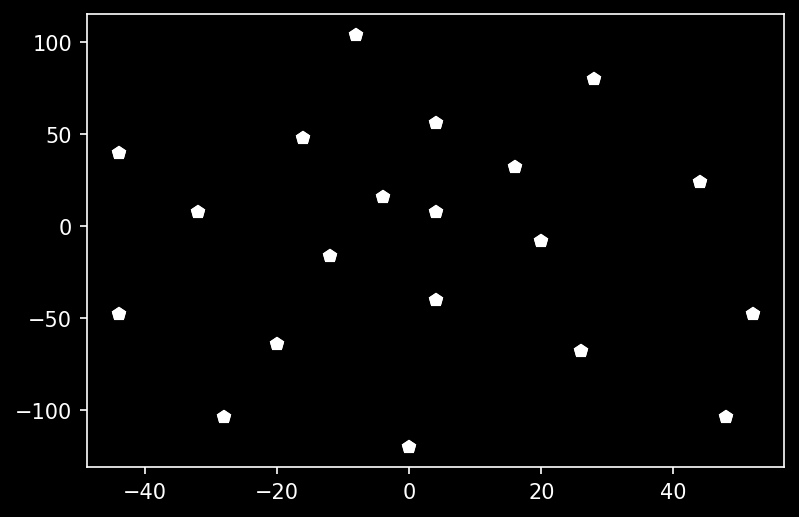

In [30]:
vector_data = """
.MACRO MSTAR2
	ICVEC
	SCDOT 8,8
	SCDOT -8,10
	SCDOT -18,-10
	SCDOT 8,-28
	SCDOT 28,-8
	SCDOT 20,20
	SCDOT 8,38
	SCDOT -20,30
	SCDOT -40,8
	SCDOT -28,-40
	SCDOT 34,-44
	SCDOT 58,18
	SCDOT 38,50
	SCDOT -10,68
	SCDOT -58,28
	SCDOT -58,-30
	SCDOT -38,-68
	SCDOT 0,-78
	SCDOT 60,-68
	SCDOT 68,-30
	RTSL
"""
vectors = parse_vector_commands(vector_data,default_color="red")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices, "MSTAR2", "p")


[(0, 0, 'BLACK'), (8.0, 16.0, 'BLACK'), (0, 0, 'WHITE'), (-8.0, 8.0, 'BLACK'), (0, 0, 'WHITE'), (-24.0, -16.0, 'BLACK'), (0, 0, 'WHITE'), (12.0, -52.0, 'BLACK'), (0, 0, 'WHITE'), (32.0, 20.0, 'BLACK'), (0, 0, 'WHITE'), (4.0, 32.0, 'BLACK'), (0, 0, 'WHITE'), (4.0, 48.0, 'BLACK'), (0, 0, 'WHITE'), (-28.0, 16.0, 'BLACK'), (0, 0, 'WHITE'), (-28.0, -32.0, 'BLACK'), (0, 0, 'WHITE'), (-4.0, -48.0, 'BLACK'), (0, 0, 'WHITE'), (16.0, -80.0, 'BLACK'), (0, 0, 'WHITE'), (32.0, 0.0, 'BLACK'), (0, 0, 'WHITE'), (24.0, 40.0, 'BLACK'), (0, 0, 'WHITE'), (8.0, 80.0, 'BLACK'), (0, 0, 'WHITE'), (-26.0, 68.0, 'BLACK'), (0, 0, 'WHITE'), (-38.0, 4.0, 'BLACK'), (0, 0, 'WHITE'), (-34.0, -48.0, 'BLACK'), (0, 0, 'WHITE'), (-2.0, -64.0, 'BLACK'), (0, 0, 'WHITE'), (4.0, -64.0, 'BLACK'), (0, 0, 'WHITE'), (28.0, -48.0, 'BLACK'), (0, 0, 'WHITE'), (52.0, 0.0, 'BLACK'), (0, 0, 'WHITE')]


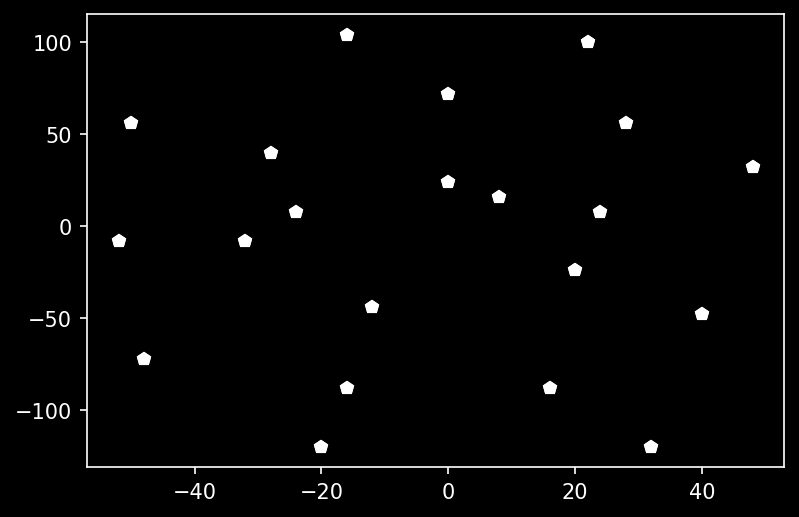

In [29]:
vector_data = """
.MACRO MSTAR3
	ICVEC
	SCDOT 10,10
	SCDOT 0,18
	SCDOT -30,8
	SCDOT -18,-2C
	SCDOT 28,-18
	SCDOT 30,8
	SCDOT 38,38
	SCDOT 0,48
	SCDOT -38,28
	SCDOT -40,-8
	SCDOT -20,-58
	SCDOT 20,-58
	SCDOT 50,-30
	SCDOT 60,20
	SCDOT 2C,64
	SCDOT -20,68
	SCDOT -64,38
	SCDOT -68,-8
	SCDOT -60,-48
	SCDOT -28,-78
	SCDOT 40,-78
	RTSL
	.ENDM
"""
vectors = parse_vector_commands(vector_data,default_color="red")
print(vectors)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices, "MSTAR3", "p")


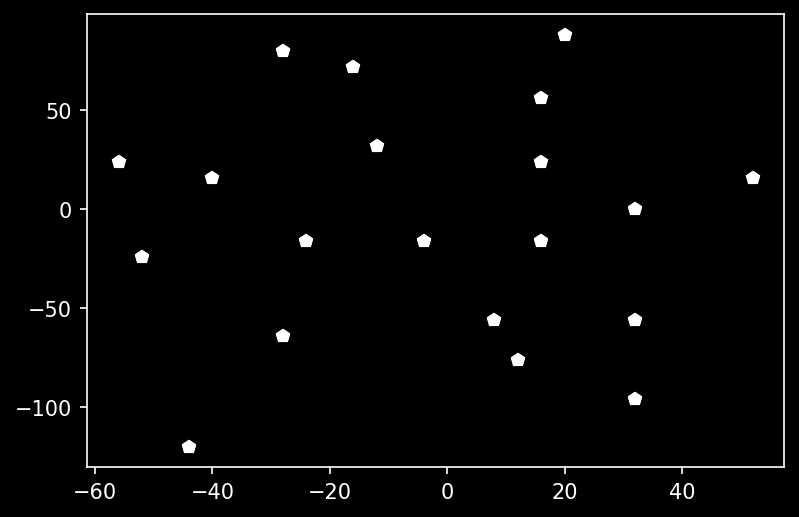

In [31]:
vector_data = """
.MACRO MSTAR4
	ICVEC
	SCDOT -8,-10
	SCDOT 20,-10
	SCDOT 20,18
	SCDOT -18,20
	SCDOT -30,-10
	SCDOT 10,-38
	SCDOT 40,0
	SCDOT 20,38
	SCDOT -20,48
	SCDOT -50,10
	SCDOT -38,-40
	SCDOT 18,-4C
	SCDOT 40,-38
	SCDOT 68,10
	SCDOT 28,58
	SCDOT -38,50
	SCDOT -70,18
	SCDOT -68,-18
	SCDOT -58,-78
	SCDOT 40,-60
	RTSL
"""
vectors = parse_vector_commands(vector_data,default_color="red")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices, "MSTAR4", "p")
